<a href="https://colab.research.google.com/github/Benqui/facial-recognition-on-keras/blob/main/modelos-keras/modelo_keras_pretren_mark2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
def gray_to_rgb(gray_imgs):
    # Convert numpy array to TensorFlow tensor
    gray_imgs_tensor = tf.convert_to_tensor(gray_imgs, dtype=tf.float32)

    # Convert grayscale images to RGB images
    rgb_images = tf.image.grayscale_to_rgb(gray_imgs_tensor)

    # Convert the tensor to a numpy array
    rgb_images_array = rgb_images.numpy()

    return rgb_images_array

In [3]:
# Load the FER2013 dataset from fer2013.csv file
# data = pd.read_csv('/content/drive/MyDrive/reconocer-jetas/fer2013/fer2013.csv')
data = pd.read_csv('/content/drive/MyDrive/Escuela/ia/reconocer-jetas/fer2013/fer2013.csv')


# Extract the pixel values and labels
pixels = data['pixels'].tolist()
labels = data['emotion'].tolist()

# Convert pixel values to numpy arrays
pixels = np.array([np.fromstring(pixel, dtype='int', sep=' ') for pixel in pixels])
pixels = pixels / 255.0  # Normalize pixel values between 0 and 1

In [4]:
# Reshape pixel arrays to match the image dimensions (48x48x1)
pixels = pixels.reshape(pixels.shape[0], 48, 48, 1)

# Convert labels to categorical format
labels = to_categorical(labels)

# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(pixels, labels, test_size=0.2, random_state=42)

In [5]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(28709, 48, 48, 1)
(7178, 48, 48, 1)
(28709, 7)
(7178, 7)


In [8]:
train_images = gray_to_rgb(train_images)
test_images = gray_to_rgb(test_images)

In [10]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(28709, 48, 48, 3)
(7178, 48, 48, 3)
(28709, 7)
(7178, 7)


In [11]:
# # Create the CNN model
# model = Sequential()
# model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(7, activation='softmax'))

In [12]:
from tensorflow.keras.applications import MobileNet, VGG16, ResNet50, VGG19
import tensorflow as tf
# pre_trained_model = base_model = tf.keras.applications.ResNet50(input_shape=(48,48,3),include_top=False,weights="imagenet")
pre_trained_model = base_model = tf.keras.applications.VGG16(input_shape=(48,48,3),include_top=False,weights="imagenet") 
# pre_trained_model = base_model = tf.keras.applications.EfficientNetB5(input_shape=(48,48,3),include_top=False,weights="imagenet")
# pre_trained_model = base_model = tf.keras.applications.MobileNetV2(input_shape=(48,48,3),include_top=False,weights="imagenet")

# pre_trained_model = base_model = tf.keras.applications.VGG19(input_shape=(48,48,3),include_top=False,weights="imagenet")
#pre_trained_model = tf.keras.applications.VGG16(input_shape=(48,48,3),include_top=False,weights=None)

58889256/58889256 [==============================] - 4s 0us/step


In [13]:
# Building Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization, Dense, Activation


modelo=Sequential()
modelo.add(pre_trained_model)
# modelo.add(Dropout(0.5))
modelo.add(Flatten())
modelo.add(BatchNormalization())
# modelo.add(Dense(32,kernel_initializer='he_uniform'))
# modelo.add(BatchNormalization())
# modelo.add(Activation('relu'))
# modelo.add(Dropout(0.5))
# modelo.add(Dense(32,kernel_initializer='he_uniform'))
# modelo.add(BatchNormalization())
# modelo.add(Activation('relu'))
# modelo.add(Dropout(0.5))
# modelo.add(Dense(32,kernel_initializer='he_uniform'))
# modelo.add(BatchNormalization())
modelo.add(Activation('relu'))
modelo.add(Dense(7,activation='softmax'))


In [14]:
# Compile the model rmsprop
# modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelo.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
# Train the model
history=modelo.fit(train_images, train_labels, epochs=120, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/120
449/449 [==============================] - 29s 63ms/step - loss: 0.2146 - accuracy: 0.9253 - val_loss: 4.0594 - val_accuracy: 0.5263
Epoch 2/120
449/449 [==============================] - 29s 65ms/step - loss: 0.1921 - accuracy: 0.9333 - val_loss: 2.5287 - val_accuracy: 0.5913
Epoch 3/120
449/449 [==============================] - 29s 64ms/step - loss: 0.1709 - accuracy: 0.9411 - val_loss: 19.9799 - val_accuracy: 0.5875
Epoch 4/120
449/449 [==============================] - 29s 64ms/step - loss: 0.1566 - accuracy: 0.9472 - val_loss: 2.8074 - val_accuracy: 0.5953
Epoch 5/120
449/449 [==============================] - 29s 64ms/step - loss: 0.1477 - accuracy: 0.9500 - val_loss: 2.6243 - val_accuracy: 0.6050
Epoch 6/120
449/449 [==============================] - 28s 63ms/step - loss: 0.1386 - accuracy: 0.9537 - val_loss: 2.6240 - val_accuracy: 0.6174
Epoch 7/120
449/449 [==============================] - 29s 65ms/step - loss: 0.1288 - accuracy: 0.9566 - val_loss: 2.5655 - val_a

In [26]:
# Evaluate the model
loss, accuracy = modelo.evaluate(test_images, test_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

225/225 [==============================] - 3s 13ms/step - loss: 4.7580 - accuracy: 0.6282
Test Loss: 4.757976531982422
Test Accuracy: 0.6281694173812866


In [23]:
import matplotlib.pyplot as plt

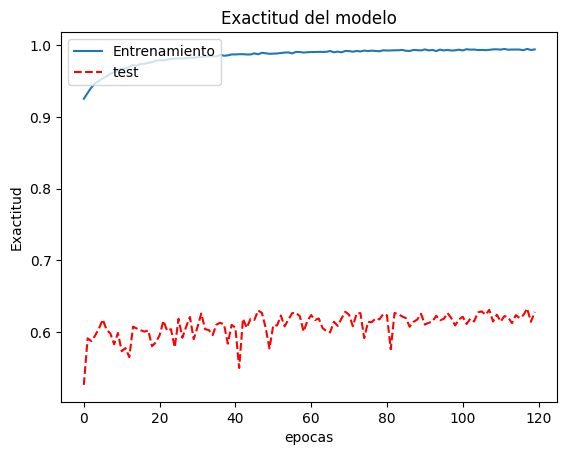

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

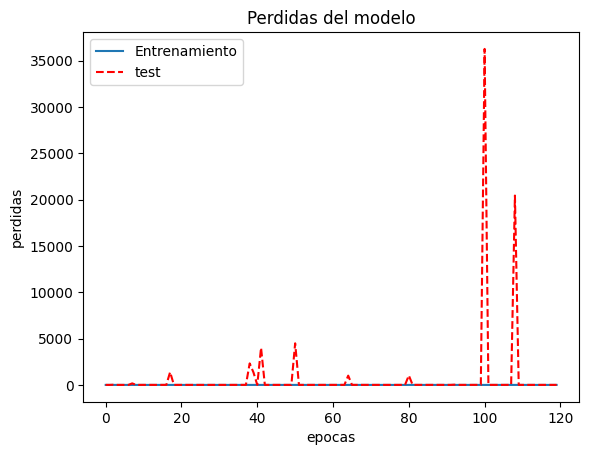

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('Perdidas del modelo')
plt.ylabel('perdidas')
plt.xlabel('epocas')
plt.legend(['Entrenamiento', 'test'], loc='upper left')
plt.show()

In [21]:
# score = modelo.evaluate(X, y, verbose=0)
# print ("model %s: %.2f%%" % (modelo.metrics_names[1], score[1]*100))

In [27]:
from tensorflow.keras.models import load_model

# Assuming you have a trained model object called 'model'
# modelo.save('/content/drive/MyDrive/Escuela/ia/reconocer-jetas/modelos_propios/mi_modelo_mkar6-300.h5')
modelo.save('/content/drive/MyDrive/Escuela/ia/reconocer-jetas/modelos_propios/modelo_mkar7-vgg16-160.h5')